# <center>The Sparks Foundation II GRIPJUNE21</center>

# ![](sparksfoundation.png)

### TASK-1: Prediction using Supervised ML(Beginner)

### Author: HARSH AGARWAL (Data Science and Business Analytics)

[![Linkedin](https://i.stack.imgur.com/gVE0j.png) LinkedIn](https://www.linkedin.com/in/harsh-agarwal-a23819200/)
&nbsp;
[![GitHub](https://i.stack.imgur.com/tskMh.png) GitHub](https://github.com/harsh219)

#### Task: Predict the percentatge of an student based on the no. of study hours. What will be the predicted score if a student studies scores for 9.25 hrs/day. This is a simple linear regression task.

### Simple Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables. Mathematically, we can represent a linear regression as: y = a0 + a1*x + ε Here,

* Y= Dependent Variable (Target Variable)
* X= Independent Variable (predictor Variable)
* a0= intercept of the line (Gives an additional degree of freedom)
* a1 = Linear regression coefficient (scale factor to each input value).
* ε = random error

### Importing the Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [76]:
plt.style.use('fivethirtyeight')

### Importing Data

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [78]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [79]:
'DataFrame contains {rows} rows and {columns} columns'.format(rows=df.shape[0], columns=df.shape[1])

'DataFrame contains 25 rows and 2 columns'

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Summary of DataFrame

In [81]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking missing values

In [82]:
# No null values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### Checking for Outliers

[]

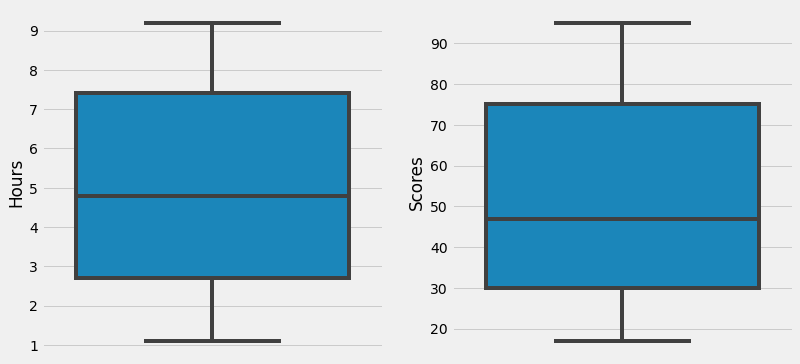

In [83]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(y='Hours', data=df, ax=ax[0])
sns.boxplot(y='Scores', data=df,ax=ax[1])
plt.plot()

### Find Correlation between the Variables

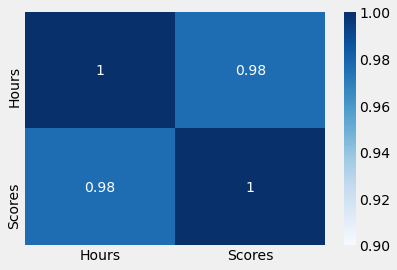

In [84]:
sns.heatmap(df.corr(), annot=True, vmin=0.9, vmax=1, cmap='Blues')
plt.show()

### Regression plot

Find relation between input and target variable

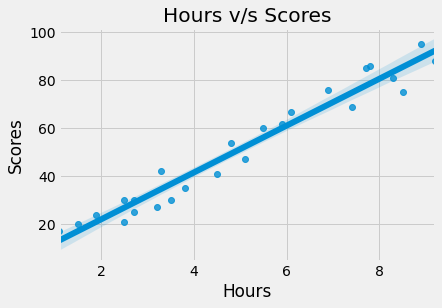

In [85]:
sns.regplot(x='Hours', y='Scores', data=df)
plt.title('Hours v/s Scores')
plt.show()

### Data Preparation for Model Creation

In [86]:
X = df['Hours'].values
y = df['Scores'].values

In [87]:
X = X.reshape(-1,1)

In [88]:
print(X.ndim, y.ndim)

2 1


### Splitting data into Training and Testing data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set X : ", X_train.shape)
print("Training Set y : ", y_train.shape)
print("Test Set X : ", X_test.shape)
print("Test Set y : ", y_test.shape)

Training Set X :  (20, 1)
Training Set y :  (20,)
Test Set X :  (5, 1)
Test Set y :  (5,)


### Model Creation

In [90]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.9678055545167994

In [91]:
print("Coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficient:  [9.68207815]
Intercept:  2.826892353899737


### Plotting Best fit line for Training and Testing data

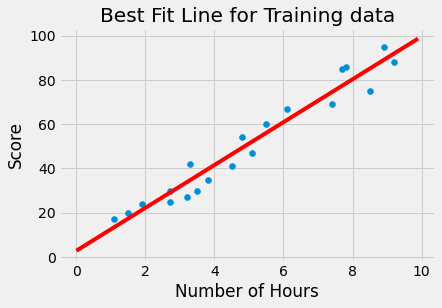

In [92]:
x_line = np.arange(0,10,0.1)
y_line = r*reg.coef_[0] + reg.intercept_
plt.scatter(X_train, y_train)
plt.plot(x_line, y_line, c='r')
plt.xlabel("Number of Hours")
plt.ylabel("Score")
plt.title("Best Fit Line for Training data")
plt.show()

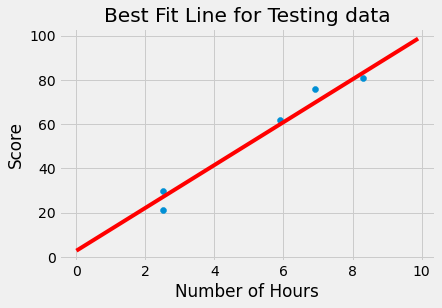

In [93]:
plt.scatter(X_test, y_test)
plt.plot(x_line, y_line, c='r')
plt.xlabel("Number of Hours")
plt.ylabel("Score")
plt.title("Best Fit Line for Testing data")
plt.show()

### Comparing Actual and Predicted Scores for Testing data

In [94]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


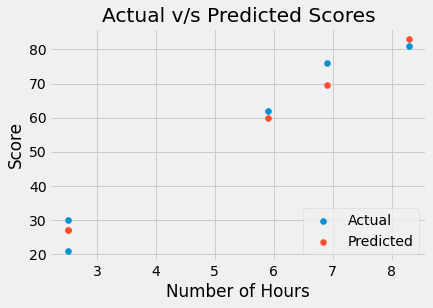

In [95]:
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted')
plt.legend(loc=4)
plt.xlabel("Number of Hours")
plt.ylabel("Score")
plt.title("Actual v/s Predicted Scores")
plt.show()

### Model Evaluation

In [96]:
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  3.9207511902099244


In [97]:
print("R2_score : ", r2_score(y_test, y_pred))

R2_score :  0.9678055545167994


### Final Observation

* We observe that the predicted values have very minimal error.
* Overall accuracy of the model is 96.7%.

### Prediction Using Model
#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [98]:
reg.predict([[9.25]])[0]

92.38611528261494

#### Here, the Linear regression model predicts that if a Student study for 9.25 hours, then he/she will get approximately 93.7% score.